# Project 4 - Predictive heart disease Analysis using scikit-learn

### Submitted by :

* Sweety Saha (ssaha2@mail.yu.edu)

* Aishwarya Deshmane (adeshman@mail.yu.edu)

* Nabid Zaman (nzaman@mail.yu.edu)





The goal of this project is to develop a machine learning model that can predict whether or not a person has heart disease based on their medical characteristics. It explores the use of several Python-based machine learning and data science libraries. 

It is meant to serve as a complete illustration of what a proof of concept for data science and machine learning may entail. 

We are going to proceed as follows:
* Problem Identification 
* Data
* Evaluation
* Features
* Modelling
* Conclusions


### Problem Identification 

The issue we will be investigating in this instance is binary categorization (a sample can only be one of two things). 

This is so that we can forecast whether or not a person has heart disease using a variety of different information about that individual. 

Can we predict whether a patient has heart disease given their clinical characteristics?



### Data

Here, you should explore the data that your problem statement is built on. This might entail sourcing, establishing various parameters, talking to specialists about it, and learning what to anticipate. 


Only 7 (Diagnosis,	Age	Gender,	PainType,	MaxHeartRate,	ExAngina,	STPeakSlope ) of the 11 characteristics in the dataset will be utilized in this instance. The variables we'll utilize to forecast our target variable are attributes. 

A goal variable can be referred to as a dependent variable, whereas attributes and characteristics are also referred to as independent variables. 

To forecast our dependent variable, we need the independent variables. 

Alternatively, in our situation, the dependent variable is whether or not a patient has heart disease, and the independent variables are their various medical characteristics.

### Evaluation 

You might provide the assessment metric at the outset of a project. 

Given how experimental machine learning is, you may argue something like, 

We'll continue with the research if we can determine whether a patient has heart disease with 95% accuracy during the proof of concept. 

This is useful because it gives a machine learning engineer or data scientist a general objective to strive for. 

The assessment metric might, however, alter over time because of the nature of testing.

### Features 

Here, you may get more specific details about each aspect of your data. You can accomplish this by conducting your own study or by consulting an authority on the subject (someone who knows about the dataset).

### Create data dictionary

1. __Diagnosis__ - Indicates whether individual has heart disease (0 = no, >0 = yes)
2. __Age__ - Age if individual in years
3. __Gender__ - 1 = male; 0 = female
4. __painType__ - Chest pain type (1 = 'Typical Angina', 2 = 'atypical angina', 3 = 'non- anginal pain', 4 = 'asymptomatic')
5. __BloodPres__ - Resting systolic blood pressure in mm Hg
6. __chol__ - Serum cholesterol in milligrams/decilitre
7. __FBSugar__ - Indicator: Is fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
8. __RestECG__ - Resting echocardiogram results: 0 = normal; > 0 = abnormal
9. __MaxHeart__ - Maximum heart rate achieved
10. __ExAngina__ - Indicator: Is exercise induced angina present? (1 = true; 0 = false)
11. __STPeakSlope__ - Stress test results: What is slope of peak exercise segment? (1 = 'upsloping', 2= 'flat', 3 = 'down sloping)

### Preparing the tools

* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.preprocessing import StandardScaler


### Load Data 

Data may be stored in a wide variety of ways. Tabular data, or data that resembles what you'd see in an Excel file, is typically stored in. in csv format. Comma-separated values is referred to as csv. 

To read.csv files, Pandas includes a built-in method called read csv() that accepts the file pathname (Github link) of your.csv file.

In [2]:
data = 'https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-5400/main/Project%204%20DATA.csv'
df = pd.read_csv(data)

In [3]:
df.shape # (rows, columns)

(303, 11)

In [4]:
df

,Diagnosis,Age,Gender,PainType,BloodPres,Chol,FBSugar,RestECG,MaxHeartRate,ExAngina,STPeakSlope
0,0,63,1,1,145,233,1,2,150,0,3
1,2,67,1,4,160,286,0,2,108,1,2
2,1,67,1,4,120,229,0,2,129,1,2
3,0,37,1,3,130,250,0,0,187,0,3
4,0,41,0,2,130,204,0,2,172,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,1,45,1,1,110,264,0,0,132,0,2
299,2,68,1,4,144,193,1,0,141,0,2
300,3,57,1,4,130,131,0,0,115,1,2
301,1,57,0,2,130,236,0,2,174,0,2


In [5]:
df2 = df.drop(['RestECG','FBSugar'],axis=1)
df2

,Diagnosis,Age,Gender,PainType,BloodPres,Chol,MaxHeartRate,ExAngina,STPeakSlope
0,0,63,1,1,145,233,150,0,3
1,2,67,1,4,160,286,108,1,2
2,1,67,1,4,120,229,129,1,2
3,0,37,1,3,130,250,187,0,3
4,0,41,0,2,130,204,172,0,1
...,...,...,...,...,...,...,...,...,...
298,1,45,1,1,110,264,132,0,2
299,2,68,1,4,144,193,141,0,2
300,3,57,1,4,130,131,115,1,2
301,1,57,0,2,130,236,174,0,2


## Data Exploration (Exploratory data analysis or EDA)

The following stage after importing a dataset is exploration. There is no one method to go about this. But you should aim to familiarize yourself with the dataset more and more. 

Compare various columns to one another and to the desired variable. Review your data dictionary to refresh your memory on the definitions of the various columns. 

Being an authority on the dataset you're dealing with is your aim. As a result, if someone has a question about it, you may explain it to them. When developing models, you can also sound test them to make sure they're not overfitting or otherwise functioning poorly (underfitting). 

The following is a quick checklist you might wish to go through because there isn't really a standard methodology for EDA. 
 
* What issue(s) are you attempting to resolve (or disprove)? 
* Which forms of data do you have, and how do you handle them? 
* What information is absent from the data, and how do you handle it? 
* What is an outlier, and why should you be concerned about it? 
* How can you enhance, modify, or eliminate features to make the most of your data? 

The head() method is one of the quickest and simplest ways to verify your data. It prints the top 5 rows for any dataframe when called, and the bottom 5 when called by tail(). You can also give them a number, such as head(10)  to show the top 10 rows.

In [6]:
df2.head()

,Diagnosis,Age,Gender,PainType,BloodPres,Chol,MaxHeartRate,ExAngina,STPeakSlope
0,0,63,1,1,145,233,150,0,3
1,2,67,1,4,160,286,108,1,2
2,1,67,1,4,120,229,129,1,2
3,0,37,1,3,130,250,187,0,3
4,0,41,0,2,130,204,172,0,1


In [7]:
df2.tail()

,Diagnosis,Age,Gender,PainType,BloodPres,Chol,MaxHeartRate,ExAngina,STPeakSlope
298,1,45,1,1,110,264,132,0,2
299,2,68,1,4,144,193,141,0,2
300,3,57,1,4,130,131,115,1,2
301,1,57,0,2,130,236,174,0,2
302,0,38,1,3,138,175,173,0,1


array([[<AxesSubplot:title={'center':'Diagnosis'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'PainType'}>,
        <AxesSubplot:title={'center':'BloodPres'}>,
        <AxesSubplot:title={'center':'Chol'}>],
       [<AxesSubplot:title={'center':'MaxHeartRate'}>,
        <AxesSubplot:title={'center':'ExAngina'}>,
        <AxesSubplot:title={'center':'STPeakSlope'}>]], dtype=object)

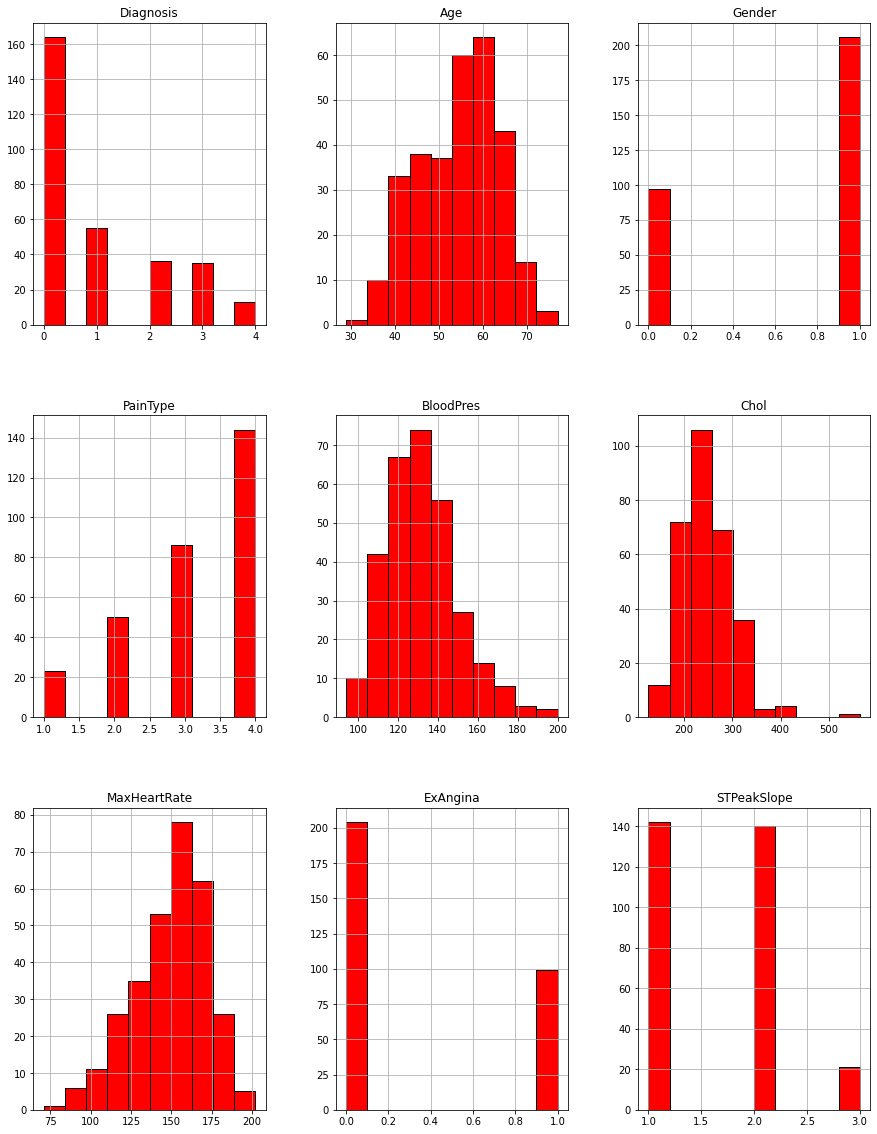

In [8]:
#Distribution of all the variables of the DataFrame
df2.hist(figsize=(15,20),bins=10,color='red',edgecolor='black')

All of the numerical variables are distributed into positive numbers, as can be seen from these histograms (there is no incoherent negative values).

You may display the frequency of each value in a category column with value_ counts().

In [9]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df2.Diagnosis.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: Diagnosis, dtype: int64

Value counts() accepts an option, normalize, which may be set to true if you'd like these numbers in percentages.

In [10]:
# Normalized value counts
df2.Diagnosis.value_counts(normalize=True)


0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: Diagnosis, dtype: float64

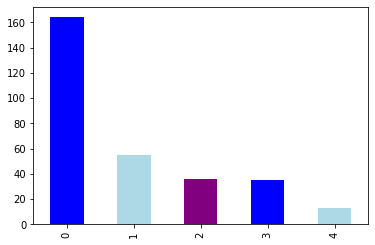

In [11]:
df2["Diagnosis"].value_counts().plot(kind="bar", color=["blue", "lightblue","purple"]);


In [12]:
df2.PainType.value_counts()

4    144
3     86
2     50
1     23
Name: PainType, dtype: int64

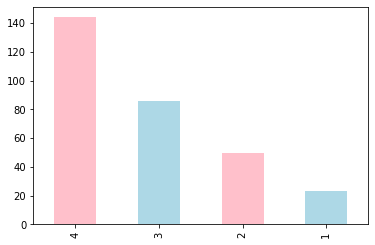

In [13]:
df2["PainType"].value_counts().plot(kind="bar", color=["pink", "lightblue"]);



In [14]:
df2.ExAngina.value_counts()

0    204
1     99
Name: ExAngina, dtype: int64

By invoking the plot() method and specifying the type of plot we'd want, in this example, bar is good, we can plot the target column value counts.

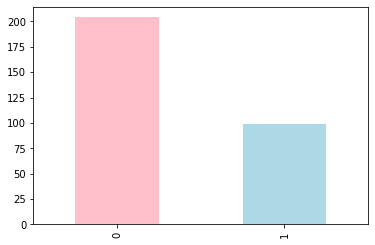

In [15]:
# Plot the value_counts with a bar graph
df2.ExAngina.value_counts().plot(kind="bar", color=["pink", "lightblue"]);

In [16]:
df2.STPeakSlope.value_counts()

1    142
2    140
3     21
Name: STPeakSlope, dtype: int64

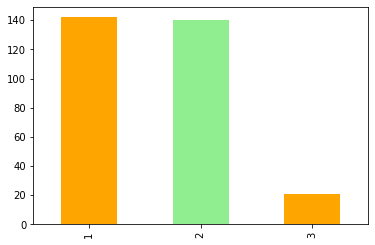

In [17]:
# Plot the value_counts with a bar graph
df2.STPeakSlope.value_counts().plot(kind="bar", color=["orange", "lightgreen"]);

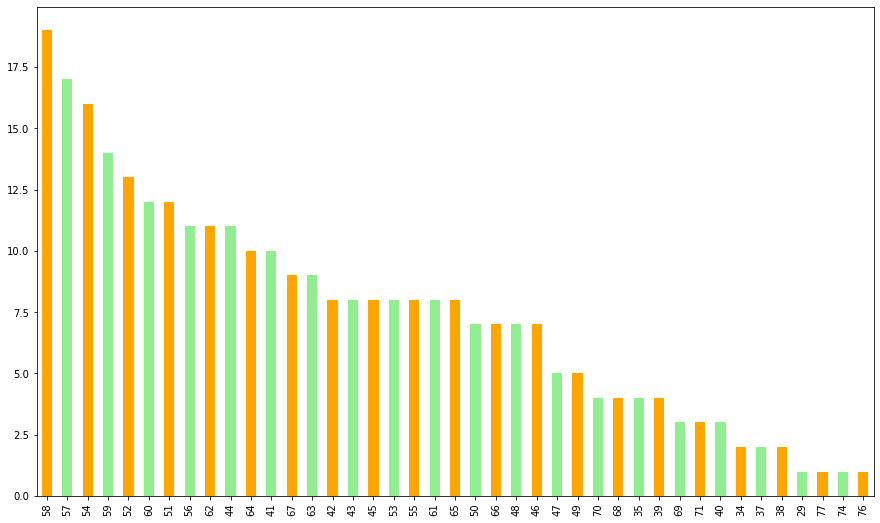

In [18]:
df2.Age.value_counts().plot(kind="bar", color=["orange", "lightgreen"],figsize=(15,9));

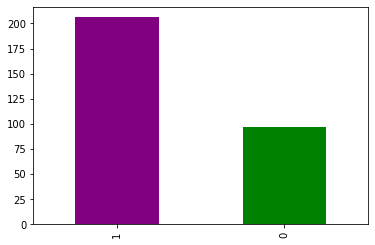

In [19]:
df2.Gender.value_counts().plot(kind="bar", color=["PURPLE", "green"]);

<AxesSubplot:ylabel='Frequency'>

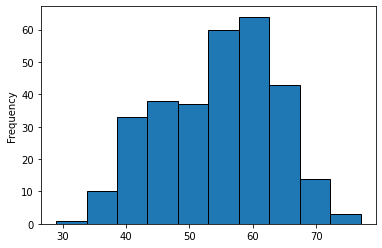

In [20]:
df2['Age'].plot(kind='hist', edgecolor='black')

The df.info() function provides a brief overview of your data's kind and the quantity of missing values. 

In our scenario, all of our columns are numerical and there are no missing data.

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Diagnosis     303 non-null    int64
 1   Age           303 non-null    int64
 2   Gender        303 non-null    int64
 3   PainType      303 non-null    int64
 4   BloodPres     303 non-null    int64
 5   Chol          303 non-null    int64
 6   MaxHeartRate  303 non-null    int64
 7   ExAngina      303 non-null    int64
 8   STPeakSlope   303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


In [22]:
# Are there any missing values?
df2.isna().sum()

Diagnosis       0
Age             0
Gender          0
PainType        0
BloodPres       0
Chol            0
MaxHeartRate    0
ExAngina        0
STPeakSlope     0
dtype: int64

Using "df.describe()" is another simple approach to see your dataframe's insides. The function "describe()" displays a variety of metrics about your numerical columns, including mean, maximum, and standard deviation.

In [23]:
df2.describe()

,Diagnosis,Age,Gender,PainType,BloodPres,Chol,MaxHeartRate,ExAngina,STPeakSlope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.937294,54.438944,0.679868,3.158416,131.689769,246.693069,149.607261,0.326733,1.600660
std,1.228536,9.038662,0.467299,0.960126,17.599748,51.776918,22.875003,0.469794,0.616226
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,71.000000,0.000000,1.000000
25%,0.000000,48.000000,0.000000,3.000000,120.000000,211.000000,133.500000,0.000000,1.000000
50%,0.000000,56.000000,1.000000,3.000000,130.000000,241.000000,153.000000,0.000000,2.000000
75%,2.000000,61.000000,1.000000,4.000000,140.000000,275.000000,166.000000,1.000000,2.000000
max,4.000000,77.000000,1.000000,4.000000,200.000000,564.000000,202.000000,1.000000,3.000000


### Heart Disease Frequency according to Gender

Use the function pd.crosstab(column 1, column 2) to compare two columns to one another. 

This is useful if you want to start developing a sense for how your independent and dependent variables interact. 

Comparing our ExAngina column to the Gender column can help. 


Recall that the ExAngina column in our data dictionary asks: "Is exercise-induced angina present?" (0 is false; 1 is true). and for sex, 0 is female and 1 is male.

In [24]:
df.Gender.value_counts()

1    206
0     97
Name: Gender, dtype: int64

There are 206 males and 97 females in our study.

In [25]:
# Compare the gender column with the ExAngina column.
pd.crosstab(df.ExAngina, df.Gender)

Gender,0,1
ExAngina,,
0,75,129
1,22,77


Angina is chest pain or discomfort that develops when your heart muscle is not receiving adequate blood flow.


What is the implication of this? Let's develop a basic heuristic. 

Since there are around 100 women in the sample and 72 of them have a value for having heart disease, we may conclude that if a participant is a woman, there is a 75% chance that she has heart disease. 

There are around 200 men overall, of whom roughly half have heart disease. Therefore, if the individual is male, we may assume that he will have heart disease 50% of the time. 

Based only on these two numbers, we may conclude that there is a 62.5% likelihood that every given person has heart disease. 

This might be our very basic baseline, and we'll use machine learning to try to outperform it.

## Visualizing our crosstab 

Using the plot() function, you can plot the crosstab by providing it with a few arguments, including kind (the sort of plot you want), figsize=(length, width), and color=[color 1, color 2] (the various colors you'd want to use). 

Different types of plots are suitable for displaying various metrics. A bar graph works well in this situation. Later, we'll see illustrations of more. And with some experience, you'll develop an understanding for the best plot to employ given various factors.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '29'),
  Text(1, 0, '34'),
  Text(2, 0, '35'),
  Text(3, 0, '37'),
  Text(4, 0, '38'),
  Text(5, 0, '39'),
  Text(6, 0, '40'),
  Text(7, 0, '41'),
  Text(8, 0, '42'),
  Text(9, 0, '43'),
  Text(10, 0, '44'),
  Text(11, 0, '45'),
  Text(12, 0, '46'),
  Text(13, 0, '47'),
  Text(14, 0, '48'),
  Text(15, 0, '49'),
  Text(16, 0, '50'),
  Text(17, 0, '51'),
  Text(18, 0, '52'),
  Text(19, 0, '53'),
  Text(20, 0, '54'),
  Text(21, 0, '55'),
  Text(22, 0, '56'),
  Text(23, 0, '57'),
  Text(24, 0, '58'),
  Text(25, 0, '59'),
  Text(26, 0, '60'),
  Text(27, 0, '61'),
  Text(28, 0, '62'),
  Text(29, 0, '63'),
  Text(30, 0, '64'),
  Text(31, 0, '65'),
  Text(32, 0, '66'),
  Text(33, 0, '67'),
  Text(34, 0, '68'),
  Text(35, 0, '69'),
  Text(36, 0, '70'),
  Text(37, 0, '71'),
  Text(38, 0, '74'),
 

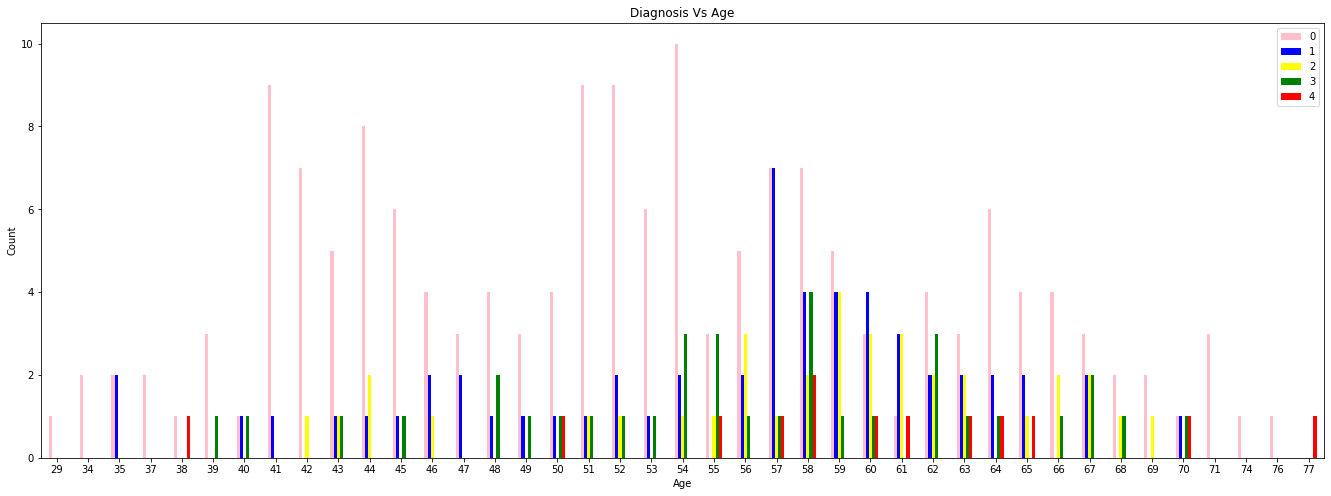

In [26]:
pd.crosstab(df2.Age, df2.Diagnosis).plot(kind="bar",
                                   figsize=(23, 8),
                                   color=["pink", "blue","yellow","green","red"])

# Add some communication
plt.title("Diagnosis Vs Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["0", "1","2","3","4"])
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

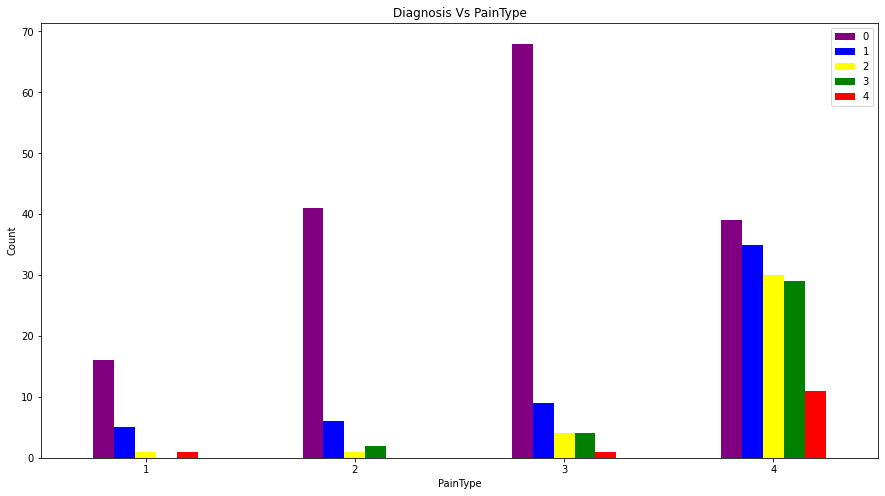

In [27]:
pd.crosstab(df2.PainType, df2.Diagnosis).plot(kind="bar",
                                   figsize=(15, 8),
                                   color=["purple", "blue","yellow","green","red"])

# Add some communication
plt.title("Diagnosis Vs PainType")
plt.xlabel("PainType")
plt.ylabel("Count")
plt.legend(["0", "1","2","3","4"])
plt.xticks(rotation=0)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

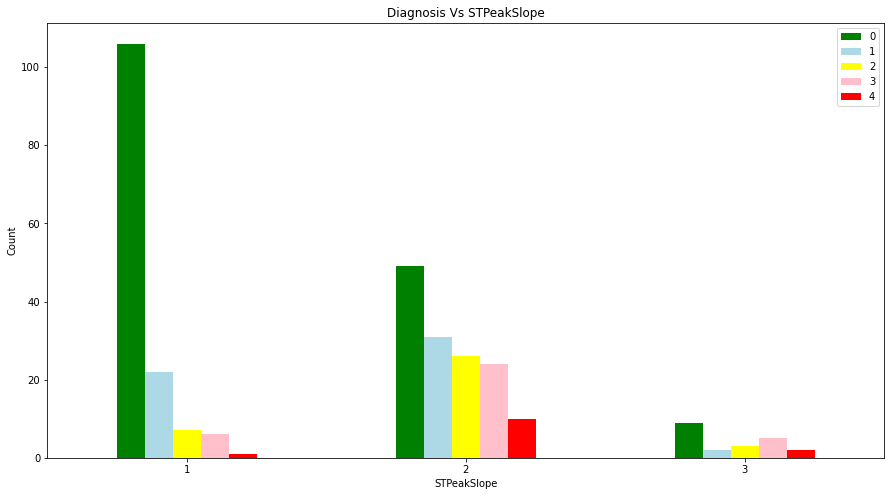

In [28]:
pd.crosstab(df2.STPeakSlope, df2.Diagnosis).plot(kind="bar",
                                   figsize=(15, 8),
                                   color=["green", "lightblue","yellow","pink","red"])

# Add some communication
plt.title("Diagnosis Vs STPeakSlope")
plt.xlabel("STPeakSlope")
plt.ylabel("Count")
plt.legend(["0", "1","2","3","4"])
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

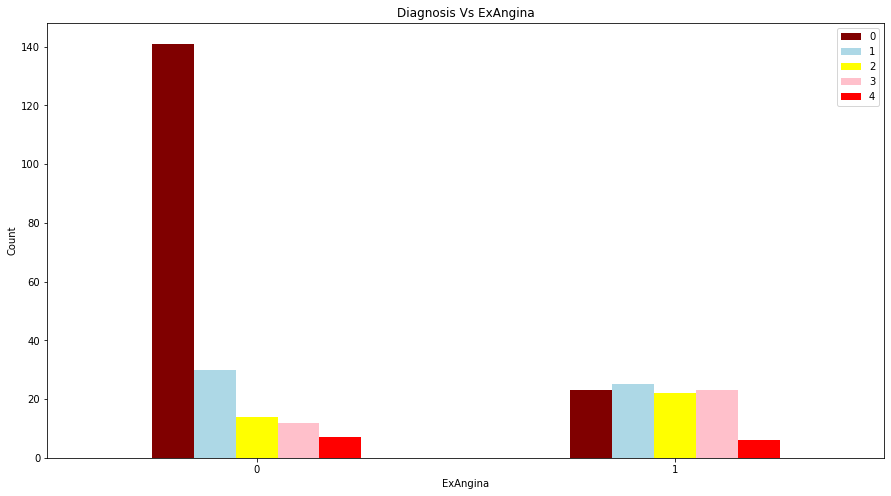

In [29]:
pd.crosstab(df2.ExAngina, df2.Diagnosis).plot(kind="bar",
                                   figsize=(15, 8),
                                   color=["maroon", "lightblue","yellow","pink","red"])

# Add some communication
plt.title("Diagnosis Vs ExAngina")
plt.xlabel("ExAngina")
plt.ylabel("Count")
plt.legend(["0", "1","2","3","4"])
plt.xticks(rotation=0)

### Max Heart Rate vs. Age  for Heart Disease 

To compare them to our heart disease ExAngina variable, let's try combining a few independent variables, including age and maxheartrate. 

We'll choose a scatter plot because age and MaxHeartRate can both have a wide range of values.

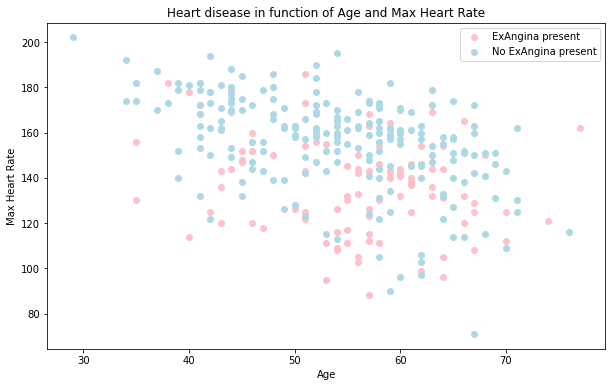

In [30]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with possitive examples
plt.scatter(df2.Age[df2.ExAngina == 1], df2.MaxHeartRate[df2.ExAngina == 1], c="pink")

# Scatter with negative examples
plt.scatter(df2.Age[df2.ExAngina == 0], df2.MaxHeartRate[df2.ExAngina == 0], c="lightblue")

# Add some helpful info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["ExAngina present", "No ExAngina present"])

What is the implication of this? 

Younger people appear to have greater maximum heart rates (dots are higher on the graph's left), whereas elderly people appear to have more blue dots. However, this might be due to the fact that there are more dots grouped together on the graph's right side (older participants) 

Although both of these are observational studies, our goal is to develop a comprehension of the data. 

Let's look at the distribution of ages.

<AxesSubplot:ylabel='Frequency'>

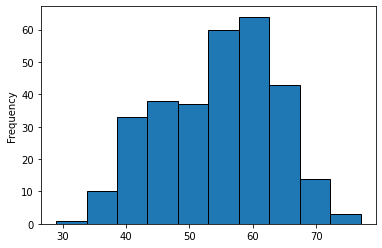

In [31]:
# Check the distribution of the age column with a histogram
df2['Age'].plot(kind='hist', edgecolor='black')

The scatter plot above shows that it has a normal distribution but is somewhat skewed to the right. 

Let's continue.

### Frequency of Heart Disease by Pain Type 

Try one more independent variable, PainType this time. 



In [32]:
pd.crosstab(df2.PainType, df.Diagnosis)

Diagnosis,0,1,2,3,4
PainType,,,,,
1,16,5,1,0,1
2,41,6,1,2,0
3,68,9,4,4,1
4,39,35,30,29,11


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

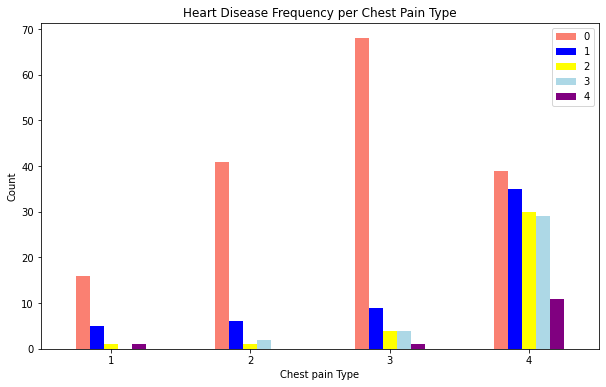

In [33]:
# Make the crosstab more visual
pd.crosstab(df.PainType, df.Diagnosis).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon","blue","yellow", "lightblue","purple"])

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Count")
plt.legend(["0", "1","2","3","4"])
plt.xticks(rotation=0)

Keep in mind the varied degrees of chest discomfort from our data dictionary. 

 chest pain type
* 1: Typical angina: chest pain related decrease blood supply to the heart
* 2: Atypical angina: chest pain not related to heart
* 3: Non-anginal pain: typically esophageal spasms (non heart related)
* 4: Asymptomatic: chest pain not showing signs of disease

It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

What even denotes atypical agina? 


At this stage, it's crucial to keep in mind that you could wish to conduct more study on your values if your data dictionary is lacking in details. Asking a specialist (such as a cardiologist or the individual who provided the data) or searching online for extra information are two ways to do this study. 

Even some medical experts appear to be baffled by the word, according to PubMed. 

"Atypical chest discomfort" is still well-liked in medical circles today, 23 years later. But its significance is still a mystery. A few articles include the phrase in their titles but don't describe it or talk about it in the body of the article. The word is used to describe noncardiac causes of chest pain in other articles.

### Relationship between unrelated variables 

We will then compare each independent variable separately. 


Considering that this could provide insight into which independent factors might or might not have an effect on our target variable. 

This may be accomplished by using df.corr(), which will generate a correlation matrix for us, or, put another way, a large table of data that shows us how closely connected each variable is to the others.

In [34]:
# Find the correlation between our independent variables
c = df2.corr()
c

,Diagnosis,Age,Gender,PainType,BloodPres,Chol,MaxHeartRate,ExAngina,STPeakSlope
Diagnosis,1.000000,0.222853,0.224469,0.407075,0.157754,0.070909,-0.415040,0.397057,0.377957
Age,0.222853,1.000000,-0.097542,0.104139,0.284946,0.208950,-0.393806,0.091661,0.161770
Gender,0.224469,-0.097542,1.000000,0.010084,-0.064456,-0.199915,-0.048663,0.146201,0.037533
PainType,0.407075,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.334422,0.384060,0.152050
BloodPres,0.157754,0.284946,-0.064456,-0.036077,1.000000,0.130120,-0.045351,0.064762,0.117382
Chol,0.070909,0.208950,-0.199915,0.072319,0.130120,1.000000,-0.003432,0.061310,-0.004062
MaxHeartRate,-0.415040,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,1.000000,-0.378103,-0.385601
ExAngina,0.397057,0.091661,0.146201,0.384060,0.064762,0.061310,-0.378103,1.000000,0.257748
STPeakSlope,0.377957,0.161770,0.037533,0.152050,0.117382,-0.004062,-0.385601,0.257748,1.000000


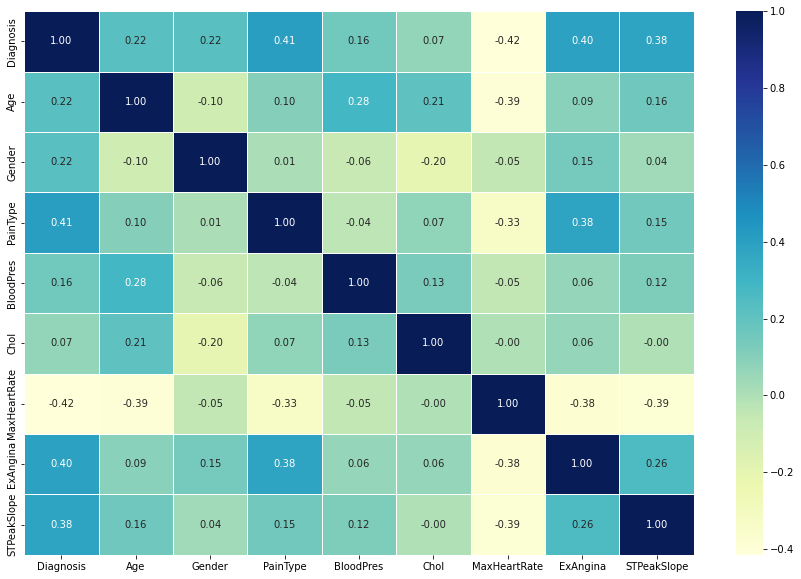

In [35]:
# let's make our correlation matrix a little prettier
c = df2.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(c,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

Much improved view. Higher positive values indicate a possible rise in the positive correlation, while higher negative values indicate a potential drop in the negative correlation (decrease)

### MaxHeartRate early findings may aid in determining if a particular person has heart disease.

* The American Heart Association states that while a damaged heart will continue to pump blood throughout the body, the effort may weaken it. The experience may cause a person's heart rate to rise. A beta-blocker may be administered by a physician or emergency department staff to reduce the heart rate and lower the heart's need for oxygen.


* The cardiovascular disease continuum is hampered at all stages by an elevated resting heart rate. Heart rate may contribute to the development of diabetes or arterial hypertension, raise the cardiovascular risk in those who already have these conditions, and determine mortality and morbidity in those with CAD and heart failure. 


* Lower is preferable when it comes to resting heart rate. It often indicates that your heart muscle is in better shape and doesn't need to work as hard to keep a regular beat. Greater blood pressure, body weight, and a higher resting heart rate have all been associated in studies to decreased physical fitness.

Know Your Numbers: Maximum and Target Heart Rate by Age
This table shows target heart rate zones for different ages. Your maximum heart rate is about 220 minus your age.3

In the age category closest to yours, read across to find your target heart rates. Target heart rate during moderate intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.

The figures are averages, so use them as a general guide.

  Age	|Target HR Zone 50-85%|	Average Maximum Heart Rate, 100%
* 20 years|	100-170bpm|	200 bpm
* 30 years|	95-162 bpm|	190 bpm
* 35 years|	93-157 bpm|	185 bpm
* 40 years|	90-153 bpm|	180 bpm
* 45 years|	88-149 bpm|	175 bpm
* 50 years|	85-145 bpm|	170 bpm
* 55 years|	83-140 bpm|	165 bpm
* 60 years|	80-136 bpm|	160 bpm
* 65 years|	78-132 bpm|	155 bpm
* 70 years|	75-128 bpm|	150 bpm

Now, For both the PainType and STPeakSlope columns in your DataFrame create a set of dummy variables. 

To create dummy varriables from PainType and STPeakSlpe, we need to replace numerical data from those columns to categorical variables. We are following the descriptions for each attributes from the given dataset dictionary.

In [36]:
# replace Pain Type col values
df2.PainType.replace({1:'Typical_Angina',
                      2:'Atypical_Angina',
                      3:'Non-anginal_pain',
                      4:'Asymptomatic'}, inplace = True)

# replace STPeakSlope col values
df2.STPeakSlope.replace({1:'up_sloping',
                        2:'flat',
                        3:'down_sloping'}, inplace = True)

df2.head()

,Diagnosis,Age,Gender,PainType,BloodPres,Chol,MaxHeartRate,ExAngina,STPeakSlope
0,0,63,1,Typical_Angina,145,233,150,0,down_sloping
1,2,67,1,Asymptomatic,160,286,108,1,flat
2,1,67,1,Asymptomatic,120,229,129,1,flat
3,0,37,1,Non-anginal_pain,130,250,187,0,down_sloping
4,0,41,0,Atypical_Angina,130,204,172,0,up_sloping


pd.get_dummies() function is applied to achieve dummy varriables from categorical columns.

In [37]:
# use get_dummies function
dum = pd.get_dummies(df2)

#print the first 5 rows
dum.head()

,Diagnosis,Age,Gender,BloodPres,Chol,MaxHeartRate,ExAngina,PainType_Asymptomatic,PainType_Atypical_Angina,PainType_Non-anginal_pain,PainType_Typical_Angina,STPeakSlope_down_sloping,STPeakSlope_flat,STPeakSlope_up_sloping
0,0,63,1,145,233,150,0,0,0,0,1,1,0,0
1,2,67,1,160,286,108,1,1,0,0,0,0,1,0
2,1,67,1,120,229,129,1,1,0,0,0,0,1,0
3,0,37,1,130,250,187,0,0,0,1,0,1,0,0
4,0,41,0,130,204,172,0,0,1,0,0,0,0,1


In [38]:
dum.describe()

,Diagnosis,Age,Gender,BloodPres,Chol,MaxHeartRate,ExAngina,PainType_Asymptomatic,PainType_Atypical_Angina,PainType_Non-anginal_pain,PainType_Typical_Angina,STPeakSlope_down_sloping,STPeakSlope_flat,STPeakSlope_up_sloping
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.937294,54.438944,0.679868,131.689769,246.693069,149.607261,0.326733,0.475248,0.165017,0.283828,0.075908,0.069307,0.462046,0.468647
std,1.228536,9.038662,0.467299,17.599748,51.776918,22.875003,0.469794,0.500213,0.371809,0.451600,0.265288,0.254395,0.499382,0.499842
min,0.000000,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,48.000000,0.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,56.000000,1.000000,130.000000,241.000000,153.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,61.000000,1.000000,140.000000,275.000000,166.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4.000000,77.000000,1.000000,200.000000,564.000000,202.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modeling 

Following a data exploration, we will attempt to apply machine learning to predict our target variable based on the 14 independent factors. 


Can we determine a patient's risk of heart disease based on clinical parameters? 

We'll be attempting to address it. 

Do you still recall our assessment metric? 

We'll move on with this research if we can determine whether a patient has cardiac disease with 95% accuracy during the proof of concept. 

That is the goal that we will pursue. 

But first, we need to prepare our dataset before we can develop a model. 



Scale the dum data to bring down all the values to the same magnitude

fit_transform function from StandardScaler will help scale the data

In [39]:
ss = StandardScaler()
scalecolumns = ['Age','BloodPres','Chol','MaxHeartRate']
dum[scalecolumns] = ss.fit_transform(dum[scalecolumns])
dum

,Diagnosis,Age,Gender,BloodPres,Chol,MaxHeartRate,ExAngina,PainType_Asymptomatic,PainType_Atypical_Angina,PainType_Non-anginal_pain,PainType_Typical_Angina,STPeakSlope_down_sloping,STPeakSlope_flat,STPeakSlope_up_sloping
0,0,0.948726,1,0.757525,-0.264900,0.017197,0,0,0,0,1,1,0,0
1,2,1.392002,1,1.611220,0.760415,-1.821905,1,1,0,0,0,0,1,0
2,1,1.392002,1,-0.665300,-0.342283,-0.902354,1,1,0,0,0,0,1,0
3,0,-1.932564,1,-0.096170,0.063974,1.637359,0,0,0,1,0,1,0,0
4,0,-1.489288,0,-0.096170,-0.825922,0.980537,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,-1.046013,1,-1.234430,0.334813,-0.770990,0,0,0,0,1,0,1,0
299,2,1.502821,1,0.700612,-1.038723,-0.376896,0,1,0,0,0,0,1,0
300,3,0.283813,1,-0.096170,-2.238149,-1.515388,1,1,0,0,0,0,1,0
301,1,0.283813,0,-0.096170,-0.206864,1.068113,0,0,1,0,0,0,1,0


Prepare the data X using all the columns from dum except diagnosis

In [40]:
X = dum.drop(['Diagnosis'],axis = 1)
X

,Age,Gender,BloodPres,Chol,MaxHeartRate,ExAngina,PainType_Asymptomatic,PainType_Atypical_Angina,PainType_Non-anginal_pain,PainType_Typical_Angina,STPeakSlope_down_sloping,STPeakSlope_flat,STPeakSlope_up_sloping
0,0.948726,1,0.757525,-0.264900,0.017197,0,0,0,0,1,1,0,0
1,1.392002,1,1.611220,0.760415,-1.821905,1,1,0,0,0,0,1,0
2,1.392002,1,-0.665300,-0.342283,-0.902354,1,1,0,0,0,0,1,0
3,-1.932564,1,-0.096170,0.063974,1.637359,0,0,0,1,0,1,0,0
4,-1.489288,0,-0.096170,-0.825922,0.980537,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,1,-1.234430,0.334813,-0.770990,0,0,0,0,1,0,1,0
299,1.502821,1,0.700612,-1.038723,-0.376896,0,1,0,0,0,0,1,0
300,0.283813,1,-0.096170,-2.238149,-1.515388,1,1,0,0,0,0,1,0
301,0.283813,0,-0.096170,-0.206864,1.068113,0,0,1,0,0,0,1,0


Prepare the data y with Diagnosis column. Assign the numbers above 0 with 1. 0 represents no heart disease and 1 represents the person has got heart disease

In [41]:
y = (dum.Diagnosis > 0).astype(int)
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: Diagnosis, Length: 303, dtype: int64

Create the train and test data using train_test_split function on X and y datasets created above

The train size is 75% and test size is 25% with the random observations picking for test with 30

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)
print("X_train :\n",X_train.head())
print("X_test:\n",X_test.head())
print("y_train:\n",y_train.head())
print("y_test:\n",y_test.head())

X_train :
           Age  Gender  BloodPres      Chol  MaxHeartRate  ExAngina  \
227  1.392002       0   1.155916  0.586305      0.980537         0   
228 -0.048643       1  -1.234430 -0.787231     -1.821905         1   
205 -1.046013       1   0.586786  1.205363     -0.114167         1   
182 -1.378470       1   0.928264 -0.052099      1.243266         0   
288  0.172994       1  -0.096170 -0.497047      0.586443         0   

     PainType_Asymptomatic  PainType_Atypical_Angina  \
227                      0                         0   
228                      1                         0   
205                      1                         0   
182                      0                         0   
288                      0                         1   

     PainType_Non-anginal_pain  PainType_Typical_Angina  \
227                          1                        0   
228                          0                        0   
205                          0                        

### LOGISTIC REGRESSION MODEL:

Used Logistic Regression as the first model

Fit the model to the train data and check the score. The score gives us the training accuracy and for model1 it is 81% 

In [43]:
lr = LogisticRegression()
model1 = lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8149779735682819

Examine the coefficients

Table below shows correlaion coefficients between all the variables like age, gender etc against the dignosis.
Age, gender, bloodpres, chol, exagina, paintype_asymptomiatic, stpealslope_down_sloping and stpeakslope_flat have positive correlation with diagnosis.
Maxheartrate, paintype_atypical_angina, paintype_non-anginal_pain, paintype_typical_angina and stpeakslope_up_sloping have negative correlation with dignosis.
Paintype_asymptomatic and gender have the higher correlation with diagosis with slope >1.0, rest of variables have correlation with slope <1.0

In [44]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,Age,[0.30102872150410526]
1,Gender,[1.8069952546516637]
2,BloodPres,[0.28697511053129204]
3,Chol,[0.200762472990411]
4,MaxHeartRate,[-0.27681119336618565]
5,ExAngina,[0.6978891556053726]
6,PainType_Asymptomatic,[1.2818402355628449]
7,PainType_Atypical_Angina,[-0.38510865496329705]
8,PainType_Non-anginal_pain,[-0.5254527302024004]
9,PainType_Typical_Angina,[-0.3713284618820918]


Generate predictions using model1 on the test data

In [45]:
predict1 = model1.predict(X_test)
predict1

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

Generate the class probabilities and this gives us the probabilities for the diagnosis 0 and 1

This classifier predicts, in second column any value greater than 0.5 has heart disease i.e. the diagnosis is 1

In [46]:
prob = model1.predict_proba(X_test)
prob[:5]

array([[0.43635066, 0.56364934],
       [0.5333042 , 0.4666958 ],
       [0.76997088, 0.23002912],
       [0.11610081, 0.88389919],
       [0.22631922, 0.77368078]])

* Confusion matrix :

Create the confustion matrix using y_test and predictions generated. By using the confusion matrix() function in Scikit-Learn and providing both the true and predicted labels, we may build a confusion matrix.

Print the true positive, false positive, true negative and false negative from the created matrix

In [47]:
cm=confusion_matrix (y_test,predict1)
cm

array([[35, 12],
       [ 4, 25]])

In [48]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(35, 12, 4, 25)

Print the precision and accuracy scores using formula

Precision quantifies the number of correct positive predictions made. The worst value is 0.0 and the best is 1.00. The formula to calculate the precision is:
Precision = TruePositives/(TruePositives + FalsePositives)

Accuracy tells how often to expect the model will correctly predict an outcome of the total number of times its predictions.
Accuracy = (TruePositives + TrueNegative)/(TruePositives + FalsePositives + TrueNegatives + FalseNegatives)

In [49]:
print("Testing Precision :",round(tp/(tp+fp),2))
print("Testing Accuracy :",round((tp+tn)/(tp+fp+fn+tn),2))

Testing Precision : 0.68
Testing Accuracy : 0.79


Print the precision and accuracy scores using the metrics from sklearn. The calculated one matches with the metrics one

Accuracy_score is the testing accuracy and in this case it is 79%

Print the classification report to see other metrics  

In [50]:
print("precision_score :",round(precision_score(y_test,predict1),2))
print("accuracy_score :",round(accuracy_score(y_test,predict1),2))
print("\nclassification_report :\n",classification_report(y_test,predict1))

precision_score : 0.68
accuracy_score : 0.79

classification_report :
               precision    recall  f1-score   support

           0       0.90      0.74      0.81        47
           1       0.68      0.86      0.76        29

    accuracy                           0.79        76
   macro avg       0.79      0.80      0.79        76
weighted avg       0.81      0.79      0.79        76



What's going on here?

__Precision__ - Indicates the proportion of positive Identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

__Recall__ - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

__F1 score__ - A combination of precision and recall. a perfect model achieves an F1 score of 1.0.
Support - The number of samples each metric was calculated on.

__Accuracy__ - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

__Macro avg__ - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.

__Weighted avg__ - Short for weighted average, the weighted average precision, recall and F1 score between classes. 

Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


Evaluate the model using 20-fold cross-validation, to see if the accuracy holds up more rigorously

The mean is 78%, which is very close to the accuracy score

In [51]:
score1 = cross_val_score(lr, X, y, scoring='accuracy', cv=20)
print (score1)
print ("\nMean :",score1.mean())

[0.8125     0.6875     0.625      0.8        0.73333333 0.8
 0.86666667 0.93333333 0.86666667 0.93333333 0.86666667 0.73333333
 0.73333333 0.8        0.66666667 0.86666667 0.66666667 0.66666667
 0.73333333 0.86666667]

Mean : 0.7829166666666665


We will utilize cross_val_score() and various scoring parameter values together with the optimal model and hyperparameters. 

When using cross_val_score(), data and labels are combined with an estimator (a machine learning model). The machine learning model is then assessed using cross-validation and a predetermined score parameter on the data and labels. 

The best hyperparameters should be reviewed before we put them to use.

### Tuning a model with GridSearchCV

The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_itercombinations, GridSearchCV will test every single possible combination.

In short:

* RandomizedSearchCV - tries n_itercombinations of hyperparameters and saves the best.
* GridSearchCV - tries every single combination of hyperparameters and saves the best.

Let's see it in action.

In [52]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [53]:
# Check the best hyperparameters
gs_log_reg.best_params_


{'C': 9.236708571873866, 'solver': 'liblinear'}

In [54]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.7763157894736842

Due to the fact that our grid can only hold a maximum of 20 distinct hyperparameter combinations, we obtain the same outcomes as previously. 

It should be noted that if your grid has many different hyperparameter combinations, it may take a while for GridSearchCV to test them all. For this reason, it's wise to start with RandomizedSearchCV, test a number of options, and then use GridSearchCV to hone your results.

In [55]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [56]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=9.236708571873866,
                        solver="liblinear")

Now we've got an instantiated classifier, let's find some cross-validated metrics.

In [57]:
# Cross-validates accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.72131148, 0.83606557, 0.81967213, 0.75      , 0.78333333])

Since there are 5 metrics here, we'll take the average.

In [58]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7820765027322405

Now we'll do the same for other classification metrics.

In [59]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.7834871794871795

In [60]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                           X,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.7335978835978836

In [61]:
# Cross_validated F1-score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.7541231054747912

Now that we have cross-validated metrics, what should we do? 

Let's picture them first.

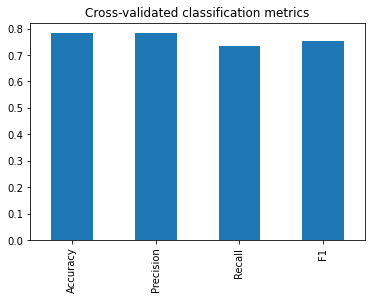

In [62]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);


Great! It appears that we could share this. To make it easier to understand where someone was, an addition may be to add the metrics to the top of each bar. 

The last item on our list of methods for evaluating our models is feature importance.

### Feature importance

Another way to phrase the question, "Which characteristics contributing most to the results of the model?" is "feature significance." 

Or in the case of our issue, attempting to forecast heart illness using a patient's medical features, which characteristics most significantly influence a model's ability to determine whether or not a person has heart disease? 

Because each model identifies patterns in data a little bit differently from the others that we've seen, how a model determines how significant those patterns are also varies. This implies that there is a somewhat different method for determining which attributes were most crucial for each model. 

Usually, you may locate an example by searching for "[MODEL TYPE] feature importance," for instance, "random forest feature significance," in the Scikit-Learn documentation. 

Since we're using LogisticRegression, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the coef_ attribute. Looking at the Scikit-Learn documentation for LogisticRegression, the coef_ attribute is the coefficient of the features in the decision function.

We can access the coef_attribute after we've fit an instance of LogisticRegression.

In [63]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=9.236708571873866,
                        solver="liblinear")

clf.fit(X_train, y_train);

It might not make much sense after looking at this. However, these numbers represent how much each attribute influences how a model determines whether a sample of patients' health data shows patterns that are more indicative of heart disease or not. 

Even with this knowledge, the coef_ array's present shape still has little meaning. However, it will if we incorporate it with the dataframe's columns (features).

In [64]:
# Match coef's of feature to columns
feature_dict = dict(zip(X.columns, list(clf.coef_[0])))

Now we've match the feature coefficient to different features, let's visualize them.

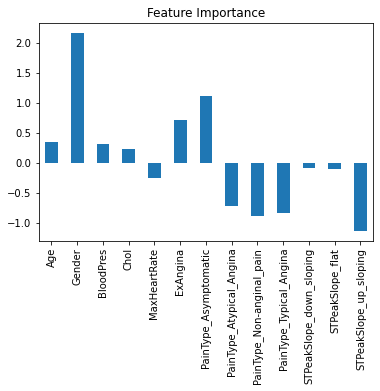

In [65]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.



For example, the ExAngina attribute has a negative value of -0.9, which means as the value for ExAngina increases, the target value decreases.

We can see this by comparing the ExAngina column to the Diagnosis column.

In [66]:
pd.crosstab(df2["ExAngina"], df2["Diagnosis"])

Diagnosis,0,1,2,3,4
ExAngina,,,,,
0,141,30,14,12,7
1,23,25,22,23,6


How about a positive correlation?

In [67]:
pd.crosstab(df["FBSugar"], df["Diagnosis"])

Diagnosis,0,1,2,3,4
FBSugar,,,,,
0,141,51,27,27,12
1,23,4,9,8,1


Looking back the data dictionary, we see FBSugar is where:

Indicator: Is fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

Create the dataframe X_reg using the prediction probability from model1 on X dataset for future use if needed

Count the records with Diagnosis as 1 and the count is 145

In [68]:
d0 = []
d1 = []
diagnose = []
prob1 = model1.predict_proba(X)

for p in range(len(prob1)):
    d0.append(prob1[p][0])
    d1.append(prob1[p][1])
    if prob1[p][1]>0.5:
        diagnose.append("Yes")
    else:
        diagnose.append("No")

In [69]:
X_reg = pd.DataFrame()
X_reg["d_0"] = d0
X_reg["d_1"] = d1
X_reg["Heart_disease"] = diagnose

X_reg[X_reg['Heart_disease']=="Yes"].count()

d_0              145
d_1              145
Heart_disease    145
dtype: int64

### KNN MODEL:

Used KNN as second model with n_neighbors value (k value) as 10

Fit the model to the training data and check the score. The score is 0.788 which gives us the correctly classified samples

In [70]:
model2 = KNeighborsClassifier(n_neighbors = 10)
model2.fit(X_train,y_train)
model2.score(X_train, y_train)

0.788546255506608

Predict the values on test data using KNN model

Use accuracy_score to compute the accuracy of the correct predictions and the accuracy with 10 k value is 80%

In [71]:
predict2 = model2.predict(X_test)
print(round(accuracy_score(y_test,predict2),2))

0.8


Since we're not sure which k value gives the best accuracy_score, getting the hyperparameter n_neighbors to check the number of neighbors for every data point

Performed and received accuracy_score for n_neighbors ranging from 1 to 50 and appended it to testing list

In [72]:
testing = []
for i in range(1,50):
    p = KNeighborsClassifier(n_neighbors = i)
    p.fit(X_train,y_train)
    testing.append(accuracy_score(y_test,p.predict(X_test)))

Plot the line graph of accuracy_scores for k-value from 1 to 50

Small k-value has low bias, low accuracy and high variance but risk of overfitting

High k-value has high bias, high accuracy and low variance and can be underfitting

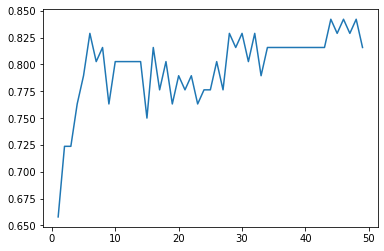

In [73]:
plt.plot(range(1,50),testing)

check the maximum accuracy score in testing with its index

In [74]:
print(testing.index(max(testing)))
print(max(testing))

43
0.8421052631578947


Use the same maximum index as k-value and calculate the training score and testing accuracy score

The training score is 72% and the accuracy score is 84%

Generate the predictions using model2

In [75]:
model2 = KNeighborsClassifier(n_neighbors = testing.index(max(testing))+1)
model2.fit(X_train,y_train)
model2.score(X_train, y_train)

0.7180616740088106

In [76]:
predict2 = model2.predict(X_test)
predict2

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [77]:
print(round(accuracy_score(y_test,predict2),3))

0.842


* Confusion matrix:

Create the confusion matrix on test data using predict 2 and check the TP, FP, TN and FN

In [78]:
cmk=confusion_matrix (y_test,predict2)
cmk

array([[38,  9],
       [ 3, 26]])

In [79]:
tn, fp, fn, tp = cmk.ravel()
(tn, fp, fn, tp)

(38, 9, 3, 26)

Check and print the metrics values using classification report

Precision is 74% and accuracy is 84%

The accuracy score calculated using KNN model is more than that of regression model

In [80]:
print("precision_score :",round(precision_score(y_test,predict2),2))
print("accuracy_score :",round(accuracy_score(y_test,predict2),2))
print("\nclassification_report :\n",classification_report(y_test,predict2))

precision_score : 0.74
accuracy_score : 0.84

classification_report :
               precision    recall  f1-score   support

           0       0.93      0.81      0.86        47
           1       0.74      0.90      0.81        29

    accuracy                           0.84        76
   macro avg       0.83      0.85      0.84        76
weighted avg       0.86      0.84      0.84        76



Generate the class probabilities and this gives us the probabilities for the diagnosis 0 and 1

This classifier predicts, in second column any value greater than 0.5 has heart disease i.e. the diagnosis is 1

In [81]:
prob2 = model2.predict_proba(X_test)
prob2[:5]

array([[0.47727273, 0.52272727],
       [0.5       , 0.5       ],
       [0.65909091, 0.34090909],
       [0.29545455, 0.70454545],
       [0.29545455, 0.70454545]])

Create the dataframe X_knn using the prediction probability from model2 on X dataset for future use if needed

Count the records with Diagnosis as 1 and the count is 139

In [82]:
d0 = []
d1 = []
diagnose = []
prob2 = model2.predict_proba(X)

for p in range(len(prob2)):
    d0.append(prob2[p][0])
    d1.append(prob2[p][1])
    if prob2[p][1]>0.5:
        diagnose.append("Yes")
    else:
        diagnose.append("No")
        
X_knn = pd.DataFrame()
X_knn["d_0"] = d0
X_knn["d_1"] = d1
X_knn["Heart_disease"] = diagnose

X_knn[X_knn['Heart_disease']=="Yes"].count()

d_0              139
d_1              139
Heart_disease    139
dtype: int64

Count the records of original dataset with Diagnosis number greater than 0 and the count is 139

In [83]:
dum[dum['Diagnosis']>0].count()

Diagnosis                    139
Age                          139
Gender                       139
BloodPres                    139
Chol                         139
MaxHeartRate                 139
ExAngina                     139
PainType_Asymptomatic        139
PainType_Atypical_Angina     139
PainType_Non-anginal_pain    139
PainType_Typical_Angina      139
STPeakSlope_down_sloping     139
STPeakSlope_flat             139
STPeakSlope_up_sloping       139
dtype: int64

Put models in a dictionary

We have shown the RandomForest just for comparison purpose and we do not find it the right fit for analysis

In [84]:

models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}


# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    assesses and fits pre-existing machine learning models. 
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [85]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

{'KNN': 0.7894736842105263,
 'Logistic Regression': 0.7894736842105263,
 'Random Forest': 0.7631578947368421}

 Let's compare our models visually as they are all fitting.

We may visualize our model scores since we've saved them to a dictionary; however, we must first convert them to a DataFrame.

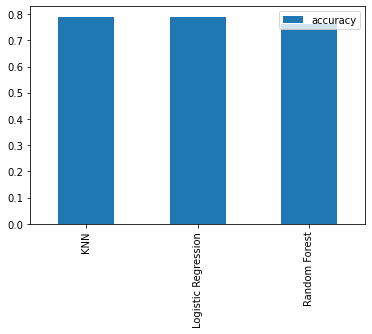

In [86]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Beautiful! We can't really see it from the graph but looking at the dictionary, the LogisticRegression() , KNN model performs best.

### UAC Scores and the ROC Curve 

Describe the ROC curve. 

By contrasting the true positive rate with the false positive rate, you can gauge how well your model is working. 

In this instance, 

Consider a diagnostic test that looks to see if a person has a certain condition to get a good illustration of a real-world issue. When a person tests positive but doesn't truly have the condition, it's called a false positive. 

On the other side, a false negative happens when a person tests negative, indicating that they are healthy, but they actually have the disease. 

Scikit-Learn has a method called plot roc curve that we can use to build ROC curves and get the area under the curve (AUC) metric. 


/Users/aishu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


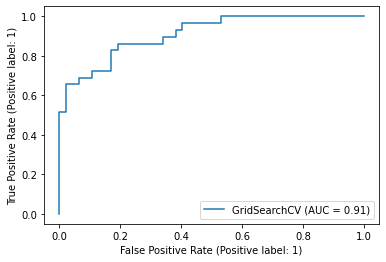

In [87]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

This is great, our model does far better then guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0. So there's still room for improvement.

What are your options for using this knowledge? 

You might wish to consult an authority on the subject about this. They might be curious to know where the machine learning model finds the most patterns (areas with the highest correlation) and where it doesn't (lowest correlation). 

This offers the following advantages: 

1. Finding out more - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.

2. Redirecting efforts - If some features offer far more value than others, this may change how you collect data for different problems. See point 3.

3. Less but better - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.


### CONCLUSION:

One of the biggest issues facing modern civilization is heart disease. 
Manually calculating the likelihood of developing heart disease based on risk factors is challenging. Machinelearning methods are helpful to forecast the results from the available data, nevertheless.

* __The prediction count of KNN model is 139 which matches the diagnosis count of original dataset, whereas the prediction count of regression model is 145__
* __The accuracy score of KNN model is 84% and that of regression model is 79%__

Considering and comparing the results from two models, KNN model has more accuracy

The top four characteristics were determined to be the kind of chest discomfort, the highest heart rate attained, ExAngina, and ST depression brought on by exercise in comparison to rest (STPeakSlope).

From attempting several models, to adjusting various models, to determining which hyperparameters were most effective. 

We've conducted a number of trials up to this point. 

In fact, we could go on forever. However, nothing lasts indefinitely. 

At this point, after experimenting with a few various approaches, we would inquire whether we had fulfilled the assessment measure. 

We'll move on with this research if we can determine whether a patient has cardiac disease with 95% accuracy during the proof of concept. 

Not in this instance. Our model's accuracy peaked at less than 90%.


### How can you reduce the chance of developing heart disease? 

Thankfully, there are several of things you can take to lessen your risk of developing heart disease: 

__Maintain blood pressure control__. A significant risk factor for heart disease is high blood pressure. The majority of individuals should get their blood pressure tested once a year or more frequently if they have high blood pressure. Take action to avoid or manage high blood pressure, including modifying your lifestyle. 


__Maintain healthy levels of triglycerides and cholesterol__. High cholesterol levels can narrow your arteries and increase your risk of heart attack and coronary artery disease. You may decrease your cholesterol by altering your lifestyle and using medications if necessary. Another form of fat seen in the blood is called triglycerides. Additionally, particularly in women, high triglyceride levels may increase the risk of coronary artery disease. 

__maintaining a healthy weight__. Your chance of developing heart disease might rise if you are obese or overweight. This is mostly due to their associations with other risk factors for heart disease, such as diabetes, high blood pressure, high blood cholesterol, and high triglyceride levels. Keeping your weight under control can reduce these dangers. 

__Adopt a balanced diet__. Limit your intake of added sugars, sodium-rich meals, and saturated fats. Consume a lot of whole grains, fresh fruit, and veggies. The DASH diet is an illustration of a meal plan that can assist you in lowering your cholesterol and blood pressure, two factors that can reduce your risk of heart disease. 

__Exercise often__. Exercise has several advantages, including boosting circulation and heart health. It can also decrease your blood pressure and cholesterol while assisting you in maintaining a healthy weight. Your risk of heart disease can be decreased by all of these. 

__Stress management__. In many respects, stress and heart disease are related. It could cause a spike in blood pressure. A heart attack may be "triggered" by extreme stress. Additionally, unhealthy stress-relieving behaviors like binge eating, heavy drinking, and smoking are hazardous for your heart. Exercise, music, focusing on something serene or calming, and meditation are a few techniques to help you manage your stress. 

__control diabetes__. Diabetes increases the likelihood of developing diabetic heart disease. This is due to the fact that diabetes-related elevated blood sugar over time can harm your blood vessels as well as the nerves that regulate your heart and blood vessels. Therefore, it's crucial to get tested for diabetes and to manage it if you do have it. 


### What's Next

What transpires if the evaluation metric isn't satisfied, we might be wondering? 

Is all we've worked for in vain? 

No. 

It implies that we are aware of what fails. In this situation, we are aware that the model we are currently employing (a tweaked version of KNN) and the particular data set we are utilizing do not meet the goals we set for them. 

Experimental steps really shines in this situation. 

Discussing several choices for moving forward with our team or conducting independent research might be a fantastic next step. 

* Could we gather further information? 

* Can we try an other model? we might wish to research CatBoost or XGBoost if we work with structured data. 

* Could we go beyond what we've already done to enhance the current models? 

* How would we export and share your model with others if it were good enough? 

The important thing to keep in mind is that time will be our biggest obstacle. Reduce the length of time between experiments, for this reason. 

we'll start to grasp what works as we experiment more and learn what doesn't work by doing so.